**Sleep Health vs. Occupation: Elisabeth Villarreal**

**Null Hypothesis (H0):** A person’s occupation does not affect their sleep quality.

**Alternative Hypothesis (Ha):** Sleep quality is affected by occupations that are associated with higher stress levels.

In [1]:
%matplotlib notebook

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats

In [3]:
# File path
sleep_health_data = Path("Sleep_Study/Sleep_health_and_lifestyle_dataset.csv")

# Read data 
sleep_df = pd.read_csv(sleep_health_data)
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Sample size for each occupation
occupation_count = sleep_df['Occupation'].value_counts()
occupation_count

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [5]:
# Filter out small sample sizes
filtered_sleep_df = sleep_df.loc[sleep_df['Occupation'].isin(['Nurse','Doctor', 'Engineer', 'Lawyer', 'Teacher', 'Accountant', 'Salesperson'])]
filtered_occupation_count = filtered_sleep_df['Occupation'].value_counts()
filtered_occupation_count

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: Occupation, dtype: int64

<IPython.core.display.Javascript object>


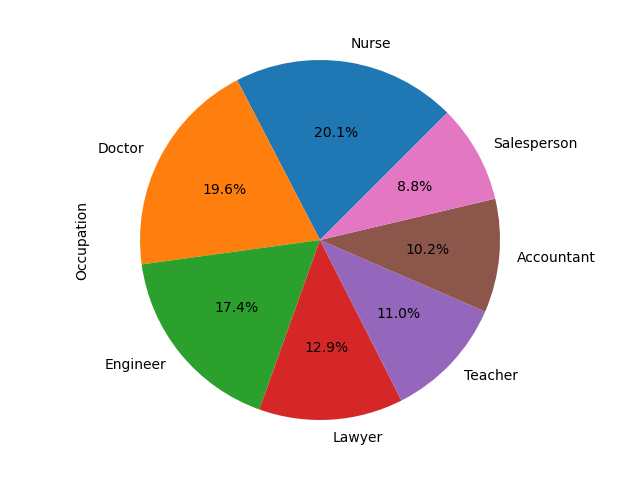

In [7]:
# Pie chart of Occupations
occupation = filtered_occupation_count
occupation.plot.pie(autopct = "%1.1f%%", startangle = 45)
plt.tight_layout()

plt.savefig("output_data/occupation_piechart.png")
plt.show()

In [8]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the quality of sleep for each occupation 
sleep_quality_mean = filtered_sleep_df.groupby('Occupation').mean()['Quality of Sleep']
sleep_quality_median = filtered_sleep_df.groupby('Occupation').median()['Quality of Sleep']
sleep_quality_var = filtered_sleep_df.groupby('Occupation').var()['Quality of Sleep']
sleep_quality_std = filtered_sleep_df.groupby('Occupation').std()['Quality of Sleep']
sleep_quality_sem = filtered_sleep_df.groupby('Occupation').sem()['Quality of Sleep']

# DataFrame of resulting series

sleep_quality_df = pd.DataFrame({'Mean Sleep Quality': sleep_quality_mean,
                       'Median Sleep Quality': sleep_quality_median,
                       'Sleep Quality Variance': sleep_quality_var,
                       'Sleep Quality Std. Dev.': sleep_quality_std,
                       'Sleep Quality Std. Err.': sleep_quality_sem})

sleep_quality_df

/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/2154792038.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleep_quality_mean = filtered_sleep_df.groupby('Occupation').mean()['Quality of Sleep']
/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/2154792038.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleep_quality_median = filtered_sleep_df.groupby('Occupation').median()['Quality of Sleep']
/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/2154792038.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a f

,Mean Sleep Quality,Median Sleep Quality,Sleep Quality Variance,Sleep Quality Std. Dev.,Sleep Quality Std. Err.
Occupation,,,,,
Accountant,7.891892,8.0,0.210210,0.458487,0.075375
Doctor,6.647887,7.0,0.574245,0.757790,0.089933
Engineer,8.412698,9.0,0.568868,0.754234,0.095025
Lawyer,7.893617,8.0,0.097132,0.311661,0.045460
Nurse,7.369863,6.0,2.402968,1.550151,0.181431
Salesperson,6.000000,6.0,0.000000,0.000000,0.000000
Teacher,6.975000,7.0,0.435256,0.659740,0.104314


In [9]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the stress level for each occupation 
stress_level_mean = filtered_sleep_df.groupby('Occupation').mean()['Stress Level']
stress_level_median = filtered_sleep_df.groupby('Occupation').median()['Stress Level']
stress_level_var = filtered_sleep_df.groupby('Occupation').var()['Stress Level']
stress_level_std = filtered_sleep_df.groupby('Occupation').std()['Stress Level']
stress_level_sem = filtered_sleep_df.groupby('Occupation').sem()['Stress Level']

# DataFrame of resulting series

stress_level_df = pd.DataFrame({'Mean Stress Level': stress_level_mean,
                       'Median Stress Level': stress_level_median,
                       'Stress Level Variance': stress_level_var,
                       'Stress Level Std. Dev.': stress_level_std,
                       'Stress Level Std. Err.': stress_level_sem})

stress_level_df

/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/3340092702.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stress_level_mean = filtered_sleep_df.groupby('Occupation').mean()['Stress Level']
/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/3340092702.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stress_level_median = filtered_sleep_df.groupby('Occupation').median()['Stress Level']
/var/folders/r8/n27_hztd5276212ft0c2q4x80000gn/T/ipykernel_36448/3340092702.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future vers

,Mean Stress Level,Median Stress Level,Stress Level Variance,Stress Level Std. Dev.,Stress Level Std. Err.
Occupation,,,,,
Accountant,4.594595,4.0,1.525526,1.235122,0.203053
Doctor,6.732394,6.0,1.884507,1.372773,0.162918
Engineer,3.888889,3.0,1.293907,1.137500,0.143312
Lawyer,5.063830,5.0,0.061055,0.247092,0.036042
Nurse,5.547945,6.0,5.723364,2.392355,0.280004
Salesperson,7.000000,7.0,0.000000,0.000000,0.000000
Teacher,4.525000,4.0,1.127564,1.061868,0.167896


In [10]:
# Combine DataFrames for a cohesive table to analyze
combined_sleep_data = pd.merge(sleep_quality_df, stress_level_df, on='Occupation', how='outer')
combined_sleep_data

,Mean Sleep Quality,Median Sleep Quality,Sleep Quality Variance,Sleep Quality Std. Dev.,Sleep Quality Std. Err.,Mean Stress Level,Median Stress Level,Stress Level Variance,Stress Level Std. Dev.,Stress Level Std. Err.
Occupation,,,,,,,,,,
Accountant,7.891892,8.0,0.210210,0.458487,0.075375,4.594595,4.0,1.525526,1.235122,0.203053
Doctor,6.647887,7.0,0.574245,0.757790,0.089933,6.732394,6.0,1.884507,1.372773,0.162918
Engineer,8.412698,9.0,0.568868,0.754234,0.095025,3.888889,3.0,1.293907,1.137500,0.143312
Lawyer,7.893617,8.0,0.097132,0.311661,0.045460,5.063830,5.0,0.061055,0.247092,0.036042
Nurse,7.369863,6.0,2.402968,1.550151,0.181431,5.547945,6.0,5.723364,2.392355,0.280004
Salesperson,6.000000,6.0,0.000000,0.000000,0.000000,7.000000,7.0,0.000000,0.000000,0.000000
Teacher,6.975000,7.0,0.435256,0.659740,0.104314,4.525000,4.0,1.127564,1.061868,0.167896


The correlation between sleep quality and stress associated with occupation is -0.86


<IPython.core.display.Javascript object>


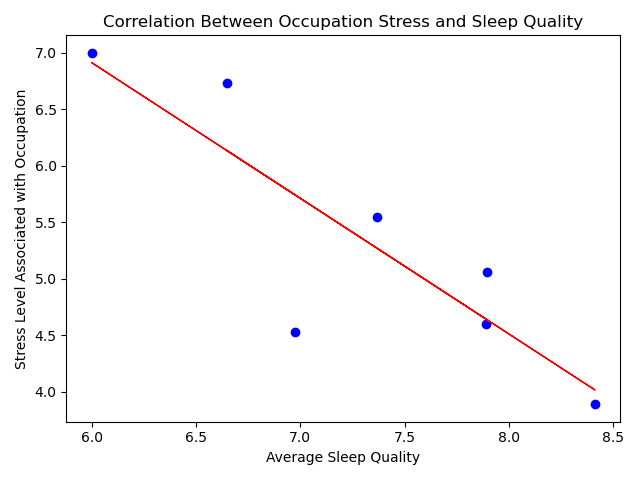

In [11]:
# Bar Plot for Occupation vs. Stress Level
occupation_correlation = st.pearsonr(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'])
print(f"The correlation between sleep quality and stress associated with occupation is {round(occupation_correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'])
regress_values=combined_sleep_data['Mean Sleep Quality']* slope + intercept

plt.scatter(combined_sleep_data['Mean Sleep Quality'],combined_sleep_data['Mean Stress Level'],color="blue")
plt.plot(combined_sleep_data['Mean Sleep Quality'], regress_values, linewidth = 1, color="red")
plt.xlabel("Average Sleep Quality")
plt.ylabel("Stress Level Associated with Occupation")
plt.title("Correlation Between Occupation Stress and Sleep Quality")
plt.tight_layout()

plt.savefig("output_data/occupation_sleep_stress_corr.png")
plt.show()

**Analysis:** Sleep quality and occupation stress have a negative correlation (r-value = -0.86). The higher the occupation stress, the lower the sleep quality.

In [12]:
# Calculate Independent (Two Sample) t-test
occupation_sleep = combined_sleep_data['Mean Sleep Quality']
occupation_stress = combined_sleep_data['Mean Stress Level']

stats.ttest_ind(occupation_sleep, occupation_stress, equal_var=False)

Ttest_indResult(statistic=3.6523583734752507, pvalue=0.0038807552010945226)

**Analysis:** The p-value is less than 0.05 (0.004). Therefore, sleep quality and occupation stress are statistically significant and we can reject the null hypothesis.